# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, I will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>
 

<ol> 
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [63]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

sns.set()

In [6]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


1. Is the distribution of body temperatures normal? 

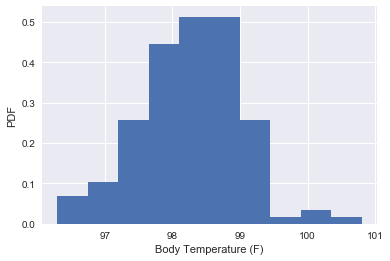

In [11]:
# Begin by creating a histogram of the body temperature
_ = plt.hist(df.temperature, normed=True)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('PDF')

In [ ]:
# The graph seems to show a Normal distribution as suspected although it is slightly skewed to the left we can safely assume that
# the disribution is Normal.

2. is the sample size large enough? Are the observations Independent

In [12]:
print('There are', len(df), 'samples over', len(list(df.columns)), 'variables.')

There are 130 samples over 3 variables.


Thus, we have sufficient data to test our hypothesis

3. Is the true population mean really 98.6 degrees F?

In [73]:
# Bootstrap Hypothesis
# Null hypothesis is that mean body temperature is 98.6F
# To setup a bootstrap we take the mean as our test statistic
mean_temp = df.temperature.mean()
print(mean_temp)
std_temp = df.temperature.std()
print(std_temp)

98.24923076923078
0.7331831580389454


In [86]:
# bootstrap replicate function to generate replicate datasets
def bootstrap_replicate_1d(data, func, seed=1):
    np.random.seed(seed)
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1, seed=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, seed+i)

    return bs_replicates

We want to compare the sample mean to the observed population mean

### H0: M = 98.6
### H1: M < 98.6

In [35]:
df_a = df.temperature.values
translated_sample = df_a - np.mean(df_a) + 98.6

In [102]:
# Take bootstrap replicates of the sample population's translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_sample, np.mean, 10000)

# p-value: fraction of replicates that are less than the observed
p_value = np.sum(bs_replicates <= np.mean(df_a)) / 10000

print('p_value = ', p_value)

p_value =  0.4911


None of the replicate values had a result similar to the given mean of 98.6. Thus the null hypothesis is false.

In [97]:
# Now perform a one_sample test because we are comparing a sample group mean to the accepted population mean,
# and determining whether the sample group mean is unlikely to be found with the null hypothesis that the mean temperature equals 98.6F
# Use t-statistic because standard deviation is unknown

t_test = stats.ttest_1samp(df.temperature, popmean=98.6)
print(t_test)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


We can see from the p-value that it is unlikely we would get a sample mean of 98.25 if the true mean were 98.6. In this case, we can reject the null that the mean is 98.6

In [100]:
# To confirm this we construct a 95% confidence interval
conf_int = np.percentile(df_a, [2.5, 97.5])

In [101]:
print('The 95% confidence interval is', conf_int)

The 95% confidence interval is [96.7225 99.4775]


In [67]:
# Now if we use z-statistic, the result will be similar because the sample size is quite large.
# As sample size increases, t ditribution approaches the standard normal z distribution.
from statsmodels.stats import weightstats as stests
z_stat = stests.ztest(df.temperature, value=98.6)
print(z_stat)

(-5.4548232923645195, 4.9021570141012155e-08)


pvalue is less than 1% so we have reason to reject the null

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [69]:
small_sample = draw_bs_reps(translated_sample, np.mean, 10)

In [70]:
t_test_small = stats.ttest_1samp(small_sample, popmean=98.6)
print(t_test_small)

Ttest_1sampResult(statistic=2.662222466033569, pvalue=0.025951103550662075)


In [72]:
z_test_small = stests.ztest(small_sample, value=98.6)
print(z_test_small)

(2.6622224660335685, 0.007762655490041436)


5. At what temperature should we consider someone's temperature to be "abnormal"?

From the confidence interval computed above, we can say with 95% confidence that the mean body temperature should fall between 98.47F and 98.73F

6. Is there a significant difference between males and females in normal temperature?

In [78]:
# Get the number of men and women in the sample
males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
no_male = len(males)
no_female = len(females)
print('There are', no_male, 'men.')
print('There are', no_female, 'women.')

There are 65 men.
There are 65 women.


In [81]:
# Compute a t-statistics to test the difference in means between men and women
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/no_male + females.var()/no_female)
t_stat_d = (diff - 0)/std
p_male = np.sum(males <= t_stat_d) / no_male
p_female = np.sum(females <= t_stat_d) / no_female
male_female_sample = stats.ttest_ind(males, females)
print(male_female_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


Used a two-sample t-test because we are comparing the mean of the males to the mean of the females. We obtained a low p-value whihc indicates that the value observed is not by chance making it unlikely that the two samples have the same mean. Thus, there is a statistical significance not a practical significance because the difference between the two values is minute.